## <center>Concepts of Data Science - Group Project</center>
### <center>Implementation and Benchmarking of a Bloom Filter</center>
#### <center>Karina Bule-Flori, Matteo Ramina</center>

### 1 Introduction

In this Jupyter notebook, we employ object-oriented programming to implement and and benchmarks a bloom filter.

### 2 Implementation

In [83]:
# import libraries

import math
import mmh3
import time
import string
from random import choices, randint, sample, shuffle
from bitarray import bitarray
import matplotlib.pyplot as plt

In [6]:
# define bloom filter

class BloomFilter(object):

	"""
	Class for Bloom filter, using murmur3 hash function
	"""

	def __init__(self, items_count, fp_prob):
		"""
		items_count : int
			Number of items expected to be stored in bloomf filter
		fp_prob : float
			False Positive probability in decimal
		"""
		# False possible probability in decimal
		self.fp_prob = fp_prob

		# Size of bit array to use
		self.size = self.get_size(items_count, fp_prob)

		# Number of hash functions to use
		self.hash_count = self.get_hash_count(self.size, items_count)

		# Bit array of given size
		self.bit_array = bitarray(self.size)

		# Initialize all bits as 0
		self.bit_array.setall(0)

	def add(self, item):
		"""
		Add an item in the filter
		"""
		digests = []
		for i in range(self.hash_count):

			# Create digest for given item
			# With different seed, digest created is different
			digest = mmh3.hash(item, i) % self.size
			digests.append(digest)

			# Set the bit True in bit_array
			self.bit_array[digest] = True

	def check(self, item):
		"""
		Check for existence of an item in filter
		"""
		for i in range(self.hash_count):
			digest = mmh3.hash(item, i) % self.size
			if self.bit_array[digest] == False:

				# If any of bit is False then its not present in filter
				# else there is probability that it exist
				return False
		return True

	@classmethod
	def get_size(self, n, p):
		"""
		Return the size of bit array(m) to used using
		following formula
		m = -(n * lg(p)) / (lg(2)^2)
		n : int
			Number of items expected to be stored in filter
		p : float
			False Positive probability in decimal
		"""
		m = -(n * math.log(p))/(math.log(2)**2)
		return int(m)

	@classmethod
	def get_hash_count(self, m, n):
		"""
		Return the hash function(k) to be used using following formula
		k = (m/n) * lg(2)

		m : int
			Size of bit array
		n : int
			Number of items expected to be stored in filter
		"""
		k = (m/n) * math.log(2)
		return int(k)

### 3 Benchmarking

#### 3.1 Performance

This section tests the performance of the bloom filter with respect to its capacity to have a false positive rate below 5%. This will be executed according to a range of array length.

In [58]:
# creation of random strings

length = 10

def generate_random_strings(size, min_length, max_length):
    
    word_list_tmp = []

    for _ in range(1, size):

        word_tmp = ''.join(choices(string.ascii_letters, k=randint(min_length, max_length)))

        word_list_tmp.append(word_tmp)

    return word_list_tmp

# creation of random strings
random_strings = generate_random_strings(1000000, 3, 25)

In [80]:
# creation of bloom filter

def test_performance(array_sizes, probability, words_list, words_list_sample_sizes):

    results = []
    for array_size in array_sizes:
    
        for sample_size in words_list_sample_sizes:

            print(f'results for array size = {array_size} and sample size of {sample_size}')
            
            bloomf = BloomFilter(array_size, probability)

            print("Size of bit array:{}".format(bloomf.size))

            words_list_sample = sample(words_list, sample_size)
            shuffle(words_list_sample)

            # Words to be added
            amount_to_be_added = int((1-probability)*sample_size)
            word_present = words_list_sample[:amount_to_be_added]

            for item in word_present:
                bloomf.add(item)

            # Word not added
            word_absent = words_list_sample[amount_to_be_added:]

            test_words = word_present + word_absent

            len(test_words)

            print(f'The percentage of absent words is: {round(len(word_absent) / len(test_words), 4) * 100}%.' )

            count = 0

            for word in test_words:
                if bloomf.check(word) == True:
                    count = count + 1

            false_positive_rate = round((count-len(word_present))/(len(test_words)-count+len(word_present)), 4)
            
            results.append({'array_size': array_size, 'sample_size': sample_size, 'false_positive_rate': false_positive_rate})

            print(f'The percentage of false positives is: {false_positive_rate * 100}%.\n')

    return results

In [81]:
test_array_sizes = [2, 5, 10, 15]
test_sample_sizes = [100, 5000, 50000]
p = 0.05

results = test_performance(test_array_sizes, p, random_strings, test_sample_sizes)

results for array size = 2 and sample size of 100
Size of bit array:12
The percentage of absent words is: 5.0%.
The percentage of false positives is: 5.26%.

results for array size = 2 and sample size of 5000
Size of bit array:12
The percentage of absent words is: 5.0%.
The percentage of false positives is: 5.26%.

results for array size = 2 and sample size of 50000
Size of bit array:12
The percentage of absent words is: 5.0%.
The percentage of false positives is: 5.26%.

results for array size = 5 and sample size of 100
Size of bit array:31
The percentage of absent words is: 5.0%.
The percentage of false positives is: 5.26%.

results for array size = 5 and sample size of 5000
Size of bit array:31
The percentage of absent words is: 5.0%.
The percentage of false positives is: 5.26%.

results for array size = 5 and sample size of 50000
Size of bit array:31
The percentage of absent words is: 5.0%.
The percentage of false positives is: 5.26%.

results for array size = 10 and sample size of

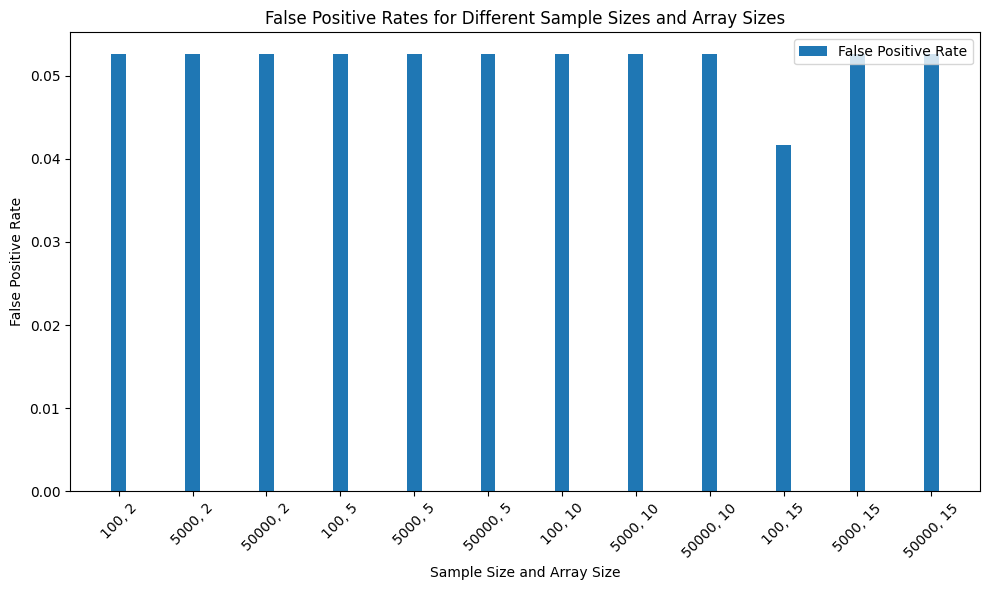

In [85]:
array_sizes = [entry['array_size'] for entry in results]
sample_sizes = [entry['sample_size'] for entry in results]
false_positive_rates = [entry['false_positive_rate'] for entry in results]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Grouped bar chart
bar_width = 0.2
index = range(len(results))
ax.bar(index, false_positive_rates, width=bar_width, label='False Positive Rate')

# Adding labels and title
ax.set_xlabel('Sample Size and Array Size')
ax.set_ylabel('False Positive Rate')
ax.set_title('False Positive Rates for Different Sample Sizes and Array Sizes')
ax.set_xticks(index)
ax.set_xticklabels([f"{size_pair['sample_size']}, {size_pair['array_size']}" for size_pair in results], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

#### 3.2 Theoretical Complexity

##### 3.2.1 Inserting

##### 3.2.2 Searching

#### 3.3 Empirical Complexity

##### 3.3.1 Inserting

##### 3.3.2 Searching

##### 3.2.1 Inserting